# Regresión Logística
## Introducción

Como ya se sabe, los modelos de regresión tienen como objeto predecir cómo afectan una o más variables explicativas (también llamadas independientes o features), sobre una  variable respuesta. Cuando la variable respuesta es de tipo cuantitativo continuo se utiliza como norma general el método de mínimo cuadrados ordinarios para estimar los parámetros del modelo resultante.

Ahora bien, ese método de resolver el problema no sirve cuando la variable respuesta es de tipo discreta (toma pocos valores), y normalmente se trata de una variable categórica con dos o más valores como atributos o categorías. En estos casos los modelos de regresión más utilizados son los denominados **modelos de regresión logística y los de tipo Softmax**, en los cuales las variables independientes o explicativas, pueden ser de tipo cuantitativo o cualitativo.

En el caso de los modelos cuya variable respuesta sólo puede tomar dos valores, estaríamos ante los denominados modelos de regresión logit o logística a los cuales se les va a dedicar este apartado. A continuación exponemos de forma resumida el aparato teórico, sobre el que se sostenta este modelo.

Supongamos una variable Y que sólo puede tomar dos valores 1 ó 0, y sea un conjunto de variables independientes que denotamos por $X={x_1,x_2, ...,x_n}$. Llamamos p a la probabilidad de que la variable aleatoria (en adelante v.a.) Y tome el valor 1 suponiendo que se haya obtenido un valor concreto para la v.a. X. Entonces el siguiente modelo de regresión:

$$p=\beta_0+\beta{_1}x{_1}+...+\beta{_n}x{_n}$$

No serviría, pues inicialmente ese modelo de regresión no daría valores entre cero y uno que son los valores que puede tomar una probabilidad como p. Entonces, para poder resolver esto, lo que se suele hacer es hacer el siguiente ajuste.

$$log(\frac{p}{1-p})=\beta_0+\beta{_1}x{_1}+...+\beta{_n}x{_n} $$

Y en este caso sí tendría sentido hace ese ajuste de regresión. Ahora bien, si en la expresión anterior, se despeja p, nos quedaría la siguiente expresión:

$$p=\frac{1}{1+e^{-(\beta_{0}+\beta_{1}x_{1}+...+\beta_{n}x_{n})}}$$

La expresión que tenemos a la derecha de la fórmula anterior se denomina función sigmoidea, y para ver qué formato presenta, a continuación se muestra un trozo de código, que permite hacer una representación gráfica de la función.


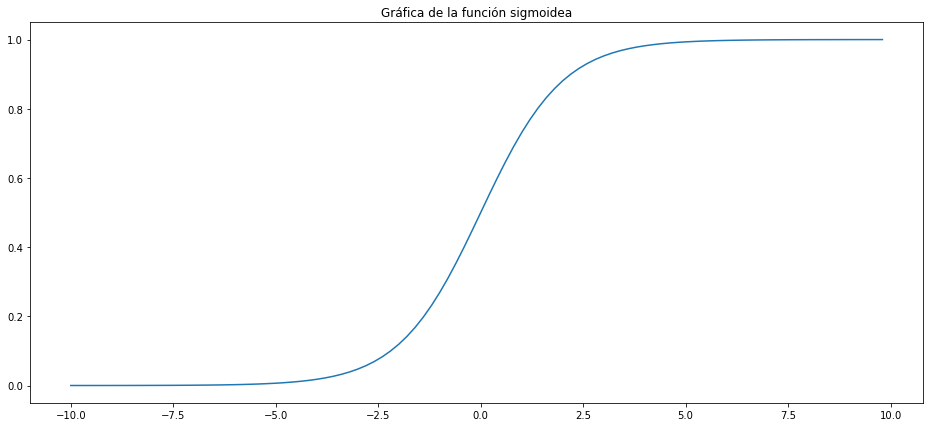

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a


plt.figure(figsize=(16,7))
plt.title("Gráfica de la función sigmoidea")
x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
plt.show()

Como puede verse en la figura, la función sigmoidea, verifica las siguientes propiedades:
    
1.- Es una función monótana creciente en todo su dominio de definición.

2.- Tiene dos asíntotas horizontales, una situada en el punto cero y otra en el punto 1.


Todas estas propiedades vista hasta este momento, son las que nos van a permitir poder hacer las correspondientes clasificaciones en el caso de tener una variable aleatoria independiente dicotómica. En este sentido, si el valor que nos da el modelo es inferior a 0.5 clasificaríamos en punto en cuestión como de la clase 0 (se asume que el modelo presenta dos modalidades que denominamos 0 ó 1) y en caso contrario se clasificará en la otra clase.

Es preciso matizar que este punto de corte normalmente tienen por denominación cutoff (o también Thershold) y que no siempre se toma el punto 0.5 como referencia de corte, sino se utilizan diferentes procedimientos para obtener este punto de tal manera que se cometa el menor error posible.


En este enlace https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python, se puede ver algún método de cómo elegir ese punto de corte con la finalidad de mejorar la fiabilidad de las predicciones del modelo.

## Primer ejemplo sobre regresión logística

A continuación procedemos a ver un ejemplo práctico sobre cómo poder utilizar esta metodología a un caso concreto, que ademas podemos encontrar en [kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv). Se trata de estudiar la existencia de posibles fraudes en la utilización de las tarjetas de crédito, en base a la información que facilita otra serie de variables observadas en la práctica diaria. 

Para desarrollar este ejemplo, utilizaremos la clase [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) que pone a nuestra disposición scikit learn.

Carguemos inicialmente los módulos que vamos a utilizar en el desarrollo del problema

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# leemos los datos

dat = pd.read_csv('data/creditcard.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/creditcard.csv'

Veamos a grandes pinceladas su contenido:

In [ ]:
dat.head()

te fichero. También existe el campo denominado class con valores cero y uno para indicar se ha habido o no fraude en la utilización de la tarjeta.

Veamos cómo están distribuidos los datos, y en especial los casos que hay de fraude o no fraude, para ello procedemos a realizar a hacer un simple diagrama de barras de la variable class

In [ ]:
f, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x='Class', data=dat)
_ = plt.title('Casos de fraude y no fraude')
_ = plt.xlabel('1= si fraude; 0 = No fraude')

Observamos que estamos claramente ante un caso de datos no balanceados, lo cual puede suponer un problema a la hora de generar el modelo. Existen diversas formas para solventar este problema, y en este ejemplo, lo que se va a aplicar es el parámetro "class_weight" de la clase LogisticRegression, que si miramos en la documentación de scikit learn lo que hace es asignar diferentes pesos a las observaciones. 

En concreto, si asignamos a este parámetro el valor de "balanced", entonces toma el valor de la variables dependiente para hacer el ajuste de forma inversamente proporcional al número de caso que tiene cada categoría de esta variable, en concreto los pesos los calcula de acuerdo a la siguiente expresión: n_samples / (n_classes * np.bincount(y))

En el resultado mostrado en la celda siguiente podemos observar que el 99.8 por ciento de la transacciones son no fraudulentas y por consiguiente el nivel de datos no balanceados es importante.

In [ ]:
(dat.Class.value_counts()[0]/len(dat))*100

In [ ]:
X = dat.drop(columns='Class', axis=1) 
y = dat.Class.values

np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
scalar = StandardScaler()
#lr = LogisticRegression(class_weight = 'balanced')

# Con l siguiente los resultados mejoran sustancialemnte
logreg = LogisticRegression()
modelo = Pipeline([('standardizar', scalar),
                    ('log_reg', logreg)])

In [ ]:
modelo.fit(X_train, y_train)

In [ ]:
y_train_hat = modelo.predict(X_train)
y_train_hat_probs = modelo.predict_proba(X_train)[:,1]

train_accuracidad = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))

print('Training AUC: %.4f %%' % train_auc_roc)

print('Training accuracy: %.4f %%' % train_accuracidad)

In [ ]:
y_test_hat = modelo.predict(X_test)
y_test_hat_probs = modelo.predict_proba(X_test)[:,1]

test_accuracidad = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))

print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracidad) 

In [ ]:
print(classification_report(y_test, y_test_hat, digits=6))

## Otro ejemplo de regresión logística

In [7]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", names=col_names)
pima = pima[1:]

In [8]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


Selecting Feature

Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [9]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [17]:
pima.dtypes

pregnant    object
glucose     object
bp          object
skin        object
insulin     object
bmi         object
pedigree    object
age         object
label       object
dtype: object

In [13]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [18]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [19]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]], dtype=int64)

## Visualizar la matriz de confusión

In [20]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

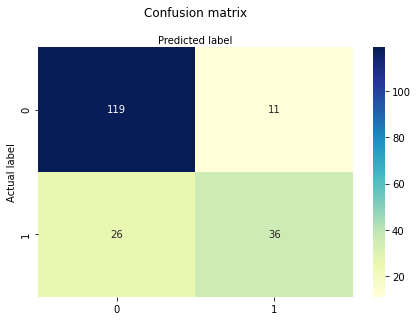

In [22]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#Text(0.5,257.44,'Predicted label')

## diferentes métricas de la matriz de confusión

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average=None))
print("Recall:",metrics.recall_score(y_test, y_pred, average = None))

Accuracy: 0.8072916666666666
Precision: [0.82068966 0.76595745]
Recall: [0.91538462 0.58064516]


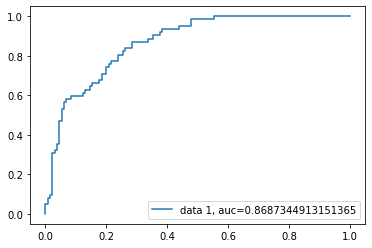

In [72]:
# Curva de ROC
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test.astype(int),  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()